## Analyse Benchmark Testbed

In [4]:
%load_ext autoreload
import trafpy
import trafpy.generator as tpg

import os
import json
import glob
import pickle



# DATA_NAME = 'social_media_cloud_k_4_L_2_n_4_chancap500_numchans1_mldat2e6_bidirectional'
DATA_NAME = 'rack_dist_sensitivity_0.8_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional'

# path_to_benchmark_data = '/scratch/datasets/trafpy/management/flowcentric/{}_testbed_data_v3.obj'.format(DATA_NAME)
# path_to_testbed_data = '/scratch/datasets/trafpy/management/flowcentric/{}_slotsize_1000.0_testbed_data'.format(DATA_NAME)
path_to_testbed_data = '/rdata/ong/trafpy/management/flowcentric/{}_slotsize_1000.0_testbed_data'.format(DATA_NAME)


if os.path.isdir(path_to_testbed_data):
    # data split into separate files in a directory
    separate_files = True
    # load paths to testbed data dirs
    testbed_data_list = sorted(glob.glob(path_to_testbed_data + '/*'))
    print(testbed_data_list)
    envs = []
    for testbed_path in testbed_data_list:
        try:
            filehandler = open(testbed_path+'/simulation.obj', 'rb')
            envs.append(pickle.load(filehandler))
        except FileNotFoundError:
            print('No simulation.obj in {}'.format(testbed_path))
        
else:
    # all data stored in single file
    separate_files = False
    # load raw testbed data
    filehandler = open(path_to_benchmark_data, 'rb')
    testbed_data = pickle.load(filehandler)
    print(testbed_data.keys())
    # unpack env dicts into list of env objects
    envs = testbed_data['envs']

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
['/rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.8_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data/benchmark_rack_load_0.1_repeat_0_scheduler_FF', '/rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.8_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data/benchmark_rack_load_0.1_repeat_0_scheduler_FS', '/rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.8_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data/benchmark_rack_load_0.1_repeat_0_scheduler_Rand', '/rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.8_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data/benchmark_rack_load_0.1_repeat_0_scheduler_SRPT', '/rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.8_k_4_L_2_n_16_chanca

In [5]:
%autoreload
import trafpy
from trafpy.manager import EnvAnalyser, EnvsPlotter

import os

# analyse
analysers = [EnvAnalyser(env, time_units='\u03BCs', info_units='B', subject_class_name=env.scheduler.scheduler_name) for env in envs]
for analyser in analysers:
    env_analyser_database_path = path_to_testbed_data+'/'+analyser.env.sim_name
    analyser.compute_metrics(measurement_start_time='auto',
                             measurement_end_time='auto',
                             env_analyser_database_path=env_analyser_database_path,
                             overwrite=False,
                             print_summary=True)


Computing metrics for env benchmark_rack_load_0.1_repeat_0_scheduler_FF...
/rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.8_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data/benchmark_rack_load_0.1_repeat_0_scheduler_FF/env_analyser_database exists and overwrite is False. Loading previously completed analysis...
Loaded previously saved analyser object from /rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.8_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data/benchmark_rack_load_0.1_repeat_0_scheduler_FF/env_analyser_database in 0.44675302505493164 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.1_repeat_0_scheduler_FF'
Measurement duration: 713895.1778240657 (Start time : 79321.6864248962 μs | End time: 793216.8642489619 μs)
Total number of generated demands (jobs or flows) passed to env: 137435
Total number of the

Loaded previously saved analyser object from /rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.8_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data/benchmark_rack_load_0.2_repeat_0_scheduler_FF/env_analyser_database in 0.587568998336792 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.2_repeat_0_scheduler_FF'
Measurement duration: 349038.09157569753 (Start time : 38782.01017507751 μs | End time: 387820.10175077507 μs)
Total number of generated demands (jobs or flows) passed to env: 137435
Total number of these demands which arrived during measurement period: 124217
Total info arrived: 2790652609.0 B
Total info transported: 2743552285.0 B
Load (abs): 7995.26663809637 B/μs
Load (frac): 0.19988166595240925 fraction of network capacity requested.
Throughput (abs): 7860.323418038724 B/μs
Throughput (frac): 0.9831221113483997 fraction of arrived info successfully transported.
T

Loaded previously saved analyser object from /rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.8_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data/benchmark_rack_load_0.3_repeat_0_scheduler_FF/env_analyser_database in 0.7071259021759033 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.3_repeat_0_scheduler_FF'
Measurement duration: 487482.6622504483 (Start time : 54164.740250049814 μs | End time: 541647.4025004981 μs)
Total number of generated demands (jobs or flows) passed to env: 274870
Total number of these demands which arrived during measurement period: 246158
Total info arrived: 5768369250.0 B
Total info transported: 5686055047.0 B
Load (abs): 11832.973142820107 B/μs
Load (frac): 0.29582432857050267 fraction of network capacity requested.
Throughput (abs): 11664.11749035444 B/μs
Throughput (frac): 0.9857300738852666 fraction of arrived info successfully transported.

Loaded previously saved analyser object from /rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.8_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data/benchmark_rack_load_0.4_repeat_0_scheduler_FF/env_analyser_database in 0.6822342872619629 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.4_repeat_0_scheduler_FF'
Measurement duration: 379858.67583751166 (Start time : 42206.5195375013 μs | End time: 422065.19537501293 μs)
Total number of generated demands (jobs or flows) passed to env: 274870
Total number of these demands which arrived during measurement period: 246694
Total info arrived: 6070071684.0 B
Total info transported: 5949607988.0 B
Load (abs): 15979.815837078666 B/μs
Load (frac): 0.39949539592696665 fraction of network capacity requested.
Throughput (abs): 15662.688169178487 B/μs
Throughput (frac): 0.9801544854375397 fraction of arrived info successfully transported

Loaded previously saved analyser object from /rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.8_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data/benchmark_rack_load_0.5_repeat_0_scheduler_FF/env_analyser_database in 0.7858827114105225 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.5_repeat_0_scheduler_FF'
Measurement duration: 288427.86584972654 (Start time : 32047.540649969615 μs | End time: 320475.40649969614 μs)
Total number of generated demands (jobs or flows) passed to env: 274870
Total number of these demands which arrived during measurement period: 247310
Total info arrived: 5778027396.0 B
Total info transported: 5534757805.0 B
Load (abs): 20032.833439922906 B/μs
Load (frac): 0.5008208359980727 fraction of network capacity requested.
Throughput (abs): 19189.4004023996 B/μs
Throughput (frac): 0.9578974666737631 fraction of arrived info successfully transported.

Loaded previously saved analyser object from /rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.8_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data/benchmark_rack_load_0.6_repeat_0_scheduler_FF/env_analyser_database in 1.0824170112609863 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.6_repeat_0_scheduler_FF'
Measurement duration: 486726.97620021773 (Start time : 54080.77513335753 μs | End time: 540807.7513335752 μs)
Total number of generated demands (jobs or flows) passed to env: 549740
Total number of these demands which arrived during measurement period: 493366
Total info arrived: 11651326242.0 B
Total info transported: 11236502772.0 B
Load (abs): 23938.114819440714 B/μs
Load (frac): 0.5984528704860178 fraction of network capacity requested.
Throughput (abs): 23085.843442911628 B/μs
Throughput (frac): 0.9643968882697088 fraction of arrived info successfully transporte

Loaded previously saved analyser object from /rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.8_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data/benchmark_rack_load_0.7_repeat_0_scheduler_FF/env_analyser_database in 1.1258530616760254 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.7_repeat_0_scheduler_FF'
Measurement duration: 412761.0131992564 (Start time : 45862.33479991738 μs | End time: 458623.34799917374 μs)
Total number of generated demands (jobs or flows) passed to env: 549740
Total number of these demands which arrived during measurement period: 494012
Total info arrived: 11483381014.0 B
Total info transported: 11003390027.0 B
Load (abs): 27820.895498326798 B/μs
Load (frac): 0.69552238745817 fraction of network capacity requested.
Throughput (abs): 26658.01680666052 B/μs
Throughput (frac): 0.9582012487076047 fraction of arrived info successfully transported.


Loaded previously saved analyser object from /rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.8_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data/benchmark_rack_load_0.8_repeat_0_scheduler_FF/env_analyser_database in 0.9317212104797363 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.8_repeat_0_scheduler_FF'
Measurement duration: 363398.0794872877 (Start time : 40377.564387476414 μs | End time: 403775.6438747641 μs)
Total number of generated demands (jobs or flows) passed to env: 549740
Total number of these demands which arrived during measurement period: 494053
Total info arrived: 11582811850.0 B
Total info transported: 10547499406.0 B
Load (abs): 31873.618777352916 B/μs
Load (frac): 0.7968404694338229 fraction of network capacity requested.
Throughput (abs): 29024.64267527581 B/μs
Throughput (frac): 0.9106164843729202 fraction of arrived info successfully transported

Loaded previously saved analyser object from /rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.8_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data/benchmark_rack_load_0.9_repeat_0_scheduler_FF/env_analyser_database in 2.1471195220947266 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.9_repeat_0_scheduler_FF'
Measurement duration: 567417.1048003858 (Start time : 63046.34497782064 μs | End time: 630463.4497782064 μs)
Total number of generated demands (jobs or flows) passed to env: 999528
Total number of these demands which arrived during measurement period: 898453
Total info arrived: 20382436336.0 B
Total info transported: 18168512304.0 B
Load (abs): 35921.43445018357 B/μs
Load (frac): 0.8980358612545893 fraction of network capacity requested.
Throughput (abs): 32019.67679559393 B/μs
Throughput (frac): 0.8913807949401167 fraction of arrived info successfully transported.


/home/zciccwf/.conda/envs/deep_scheduler/lib/python3.8/site-packages/sigfig/sigfig.py:571: UserWarning: warning: 4 significant figures requested from number with only 3 significant figures
  warn("warning: %d significant figures requested from number with only %d significant figures" % (given['sigfigs'], len(num.map)))
/home/zciccwf/.conda/envs/deep_scheduler/lib/python3.8/site-packages/sigfig/sigfig.py:432: UserWarning: no number provided, assuming zero (0)
  warn('no number provided, assuming zero (0)')
/home/zciccwf/.conda/envs/deep_scheduler/lib/python3.8/site-packages/sigfig/sigfig.py:571: UserWarning: warning: 4 significant figures requested from number with only 1 significant figures
  warn("warning: %d significant figures requested from number with only %d significant figures" % (given['sigfigs'], len(num.map)))


,Load,Subject,T-Score,Mean FCT (μs),p99 FCT (μs),Max FCT (μs),Throughput Frac,Frac Flows Dropped,Frac Info Dropped
0,0.1,FS,-406.831846,1519.8,1997.3,34587.4,0.997307,0.00203,0.00269
1,0.1,SRPT,-413.307629,1520.2,1998.2,34587.4,0.997222,0.00206,0.00278
2,0.1,Rand,-415.017817,1545.6,2759.9,49163.1,0.997097,0.00207,0.00290
3,0.1,FF,-416.646376,1563.5,3117.3,34587.4,0.997290,0.00207,0.00271
4,0.2,SRPT,-1277.387318,1533.6,2326.0,47434.4,0.984309,0.00634,0.01570
5,0.2,FS,-1280.636419,1530.9,1998.6,41434.4,0.983828,0.00636,0.01620
6,0.2,Rand,-1314.874534,1593.9,3021.5,105245.4,0.981639,0.00653,0.01840
7,0.2,FF,-1366.796988,1646.6,4578.2,39841.1,0.983122,0.00679,0.01690
8,0.3,SRPT,-692.934700,1541.6,2679.3,79419.5,0.987273,0.00344,0.01270
9,0.3,FS,-696.216740,1534.4,2238.0,66419.5,0.986831,0.00346,0.01320


,Load,Mean FCT (μs),p99 FCT (μs),Max FCT (μs),Throughput Frac,Frac Flows Dropped,Frac Info Dropped
0,0.1,FS,FS,FS+SRPT+FF,FS,FS,FS
1,0.2,FS,FS,FF,SRPT,SRPT,SRPT
2,0.3,FS,FS,FS,SRPT,SRPT,SRPT
3,0.4,FS,FS,FS,FS,FS,FS
4,0.5,FS,FS,FS,SRPT,FS,SRPT
5,0.6,FS,SRPT,FS,FS,FS,FS
6,0.7,FS,SRPT,FS,FS,FS,FS
7,0.8,FS,SRPT,FF,FS,SRPT,FS
8,0.9,FS,SRPT,FS,FS,FS,FS


,Load,Mean FCT (μs),p99 FCT (μs),Max FCT (μs),Throughput Frac,Frac Flows Dropped,Frac Info Dropped
0,0.1,FS(-2.795%) | SRPT(-2.769%) | Rand(-1.145%) | FF,FS(-35.93%) | SRPT(-35.9%) | Rand(-11.47%) | FF,FS(-29.65%) | SRPT(-29.65%) | FF(-29.65%) | Rand,FS(0.02106%) | FF(0.01936%) | SRPT(0.01254%) |...,FS(-1.932%) | SRPT(-0.4831%) | Rand(0.0%) | FF,FS(-7.241%) | FF(-6.552%) | SRPT(-4.138%) | Rand
1,0.2,FS(-7.027%) | SRPT(-6.863%) | Rand(-3.201%) | FF,FS(-56.35%) | SRPT(-49.19%) | Rand(-34.0%) | FF,FF(-62.14%) | FS(-60.63%) | SRPT(-54.93%) | Rand,SRPT(0.272%) | FS(0.223%) | FF(0.1511%) | Rand,SRPT(-6.627%) | FS(-6.333%) | Rand(-3.829%) | FF,SRPT(-14.67%) | FS(-11.96%) | FF(-8.152%) | Rand
2,0.3,FS(-16.88%) | SRPT(-16.49%) | Rand(-9.784%) | FF,FS(-72.83%) | SRPT(-67.47%) | Rand(-49.06%) | FF,FS(-67.17%) | FF(-61.82%) | SRPT(-60.75%) | Rand,SRPT(1.086%) | FS(1.041%) | FF(0.9284%) | Rand,SRPT(-11.57%) | FS(-11.05%) | Rand(-6.684%) | FF,SRPT(-45.49%) | FS(-43.35%) | FF(-38.63%) | Rand
3,0.4,FS(-27.64%) | SRPT(-27.12%) | Rand(-13.81%) | FF,FS(-79.74%) | SRPT(-78.38%) | Rand(-51.05%) | FF,FS(-69.69%) | SRPT(-65.08%) | FF(-53.99%) | Rand,FS(5.613%) | SRPT(5.104%) | FF(5.041%) | Rand,FS(-41.05%) | SRPT(-40.47%) | Rand(-23.54%) | FF,FS(-78.33%) | SRPT(-71.15%) | FF(-70.4%) | Rand
4,0.5,FS(-39.69%) | SRPT(-38.83%) | Rand(-20.65%) | FF,FS(-84.29%) | SRPT(-83.86%) | Rand(-46.05%) | FF,FS(-55.23%) | SRPT(-50.01%) | FF(-11.04%) | Rand,SRPT(16.13%) | FS(15.72%) | FF(15.15%) | Rand,FS(-35.39%) | SRPT(-35.27%) | Rand(-4.68%) | FF,SRPT(-79.76%) | FS(-77.8%) | FF(-74.94%) | Rand
5,0.6,FS(-52.38%) | SRPT(-51.18%) | Rand(-4.386%) | FF,SRPT(-86.49%) | FS(-86.47%) | Rand(-2.171%) | FF,FS(-60.37%) | SRPT(-34.88%) | FF(-31.13%) | Rand,FS(26.92%) | FF(25.83%) | SRPT(25.13%) | Rand,FS(-60.09%) | SRPT(-58.62%) | FF(-11.74%) | Rand,FS(-88.33%) | FF(-84.79%) | SRPT(-82.52%) | Rand
6,0.7,FS(-61.37%) | SRPT(-59.9%) | Rand(-5.076%) | FF,SRPT(-89.56%) | FS(-88.33%) | FF(-3.446%) | Rand,FS(-50.75%) | FF(-45.22%) | SRPT(-36.51%) | Rand,FS(46.51%) | FF(45.64%) | SRPT(42.87%) | Rand,FS(-71.8%) | SRPT(-70.6%) | FF(-36.61%) | Rand,FS(-89.44%) | FF(-87.78%) | SRPT(-82.46%) | Rand
7,0.8,FS(-67.55%) | SRPT(-66.77%) | Rand(-14.06%) | FF,SRPT(-89.53%) | FS(-86.16%) | FF(-1.25%) | Rand,FF(-35.34%) | FS(-25.64%) | SRPT(-1.108%) | Rand,FS(58.33%) | FF(57.74%) | SRPT(52.39%) | Rand,SRPT(-78.24%) | FS(-77.8%) | FF(-34.4%) | Rand,FS(-79.69%) | FF(-78.87%) | SRPT(-71.63%) | Rand
8,0.9,FS(-75.27%) | SRPT(-75.21%) | FF(-8.885%) | Rand,SRPT(-92.46%) | FS(-87.53%) | FF(-41.52%) | Rand,FS(-16.4%) | FF(-10.83%) | SRPT(-9.878%) | Rand,FS(66.32%) | FF(65.57%) | SRPT(48.22%) | Rand,FS(-88.75%) | SRPT(-86.7%) | FF(-33.33%) | Rand,FS(-77.27%) | FF(-76.41%) | SRPT(-56.28%) | Rand


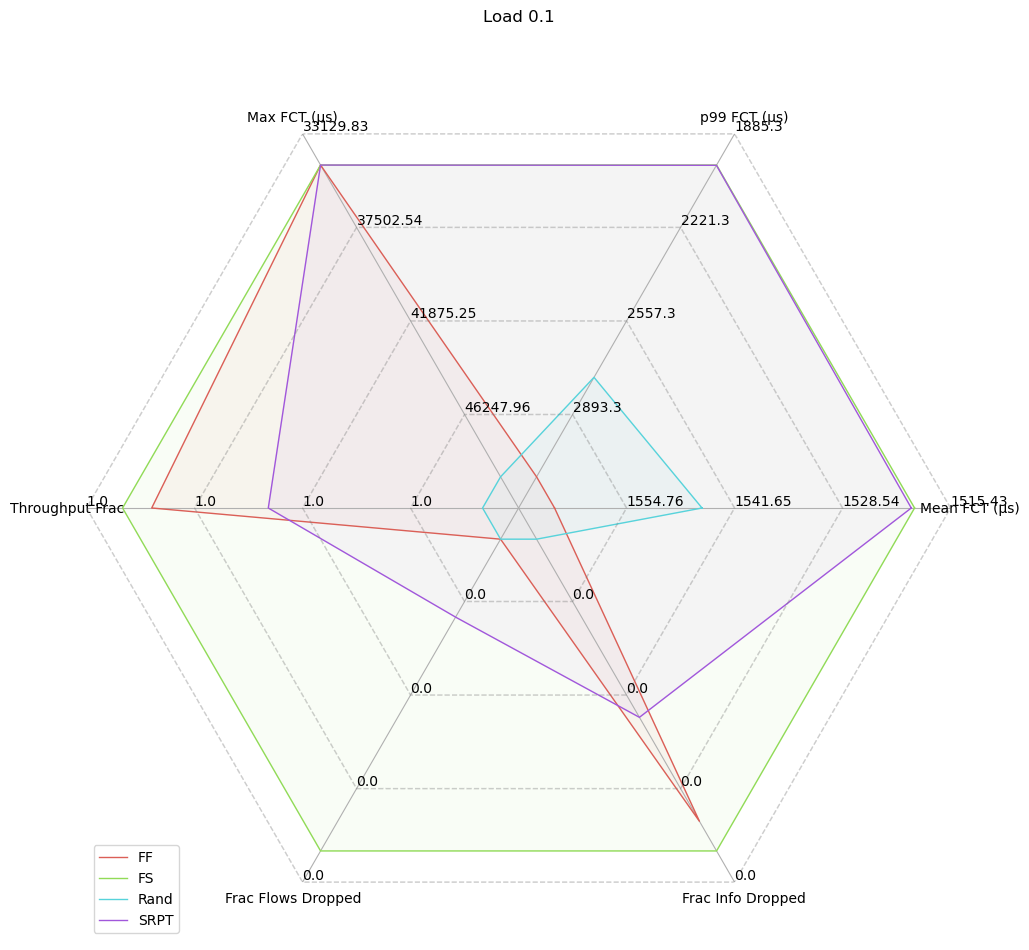

Exception: 

In [6]:
%autoreload
import trafpy
from trafpy.manager import EnvAnalyser, EnvsPlotter

import time


start = time.time()
    
# plot
plotter = EnvsPlotter(time_units='\u03BCs', info_units='B')
_ = plotter.display_t_score_table(*analysers, display_table=True)
raise Exception()
# _ = plotter.plot_t_score_scatter(*analysers, gridlines=True, figsize=(4, 3), legend_ncol=2)

# COMMENT IF HAVEN'T TRACKED QUEUE EVOLUTION AND SCHEDULER DECISION COLOUR GRID
# _ = plotter.plot_src_dst_queue_evolution_for_different_loads('server_2', 'server_10', 'queue_lengths_num_flows', *analysers)
# _ = plotter.plot_src_dst_queue_evolution_for_different_loads('server_2', 'server_10', 'queue_lengths_info_units', *analysers)
# _ = plotter.plot_demand_slot_colour_grid_for_different_schedulers(*analysers)

# COMMENT IF WANT TO SAVE TIME
# _ = plotter.plot_link_utilisation_vs_time_for_different_loads(*analysers, mean_period=10, figsize=(6, 2), legend_ncol=2, plot_legend=False) # mean_period=2500
# _ = plotter.plot_link_concurrent_demands_vs_time_for_different_loads(*analysers, mean_period=500)




_ = plotter.plot_demand_completion_time_vs_size_for_different_loads(*analysers, gridlines=True, figsize=(4, 3), legend_ncol=2)
_ = plotter.plot_throughput_rate_vs_load(*analysers, plot_bar_charts=False, gridlines=True, figsize=(6, 2), legend_ncol=2)
_ = plotter.plot_throughput_frac_vs_load(*analysers, plot_bar_charts=False, gridlines=True, figsize=(6, 2), legend_ncol=2)
_ = plotter.plot_fcts_cdf_for_different_loads(*analysers, gridlines=True, figsize=(6, 2), legend_ncol=2)
_ = plotter.plot_mean_fct_vs_load(*analysers, logscale=True, gridlines=True, cdf_figsize=(6, 2), scatter_figsize=(4,3), legend_ncol=2)
_ = plotter.plot_99th_percentile_fct_vs_load(*analysers, logscale=True, gridlines=True, cdf_figsize=(6, 2), scatter_figsize=(4,3), legend_ncol=2)
_ = plotter.plot_max_fct_vs_load(*analysers, gridlines=True, logscale=True, cdf_figsize=(6, 2), scatter_figsize=(4,3), legend_ncol=2)
_ = plotter.plot_fraction_of_arrived_flows_dropped_vs_load(*analysers, logscale=True, gridlines=True, cdf_figsize=(6, 2), scatter_figsize=(4,3), legend_ncol=2)
_ = plotter.plot_fraction_of_arrived_info_dropped_vs_load(*analysers, logscale=True, gridlines=True, cdf_figsize=(6, 2), scatter_figsize=(4,3), legend_ncol=2)

end = time.time()
print('Time to plot: {}'.format(end-start))

In [ ]:
# CUSTOM RADAR PLOT(S)
%load_ext autoreload
%autoreload
import trafpy.generator as tpg

time_units = '\u03BCs'
info_units = 'B'

plot_dict = {'Mean FCT ({})'.format(time_units): {'range': [0, 1], 'classes': {'class1': 0.2,
                                                         'class2': 0.4}},
             'p99 FCT ({})'.format(time_units): {'range': [0, 100], 'classes': {'class1': 60,
                                                           'class2': 20}},
             'Max FCT ({})'.format(time_units): {'range': [1, 5], 'classes': {'class1': 2,
                                                         'class2': 5}},
             'Throughput Rate ({}/{})'.format(info_units, time_units): {'range': [0, 10], 'classes': {'class1': 7,
                                                          'class2': 3}},
             'Frac Info Dropped': {'range': [0, 10], 'classes': {'class1': 7,
                                                          'class2': 3}},
             'Frac Flows Dropped': {'range': [10, 0], 'classes': {'class1': 1,
                                                          'class2': 2}}
            }

_ = tpg.plot_radar(plot_dict)

# Custom Plots

In [ ]:
# PLOT SCHEDULER SENSITIVITY TO LOAD
%load_ext autoreload
%autoreload
import trafpy.generator as tpg

from collections import defaultdict
import sigfig


def get_summary_dict(analysers, headers, time_units='', info_units=''):
    summary_dict = {header: [] for header in headers}
    for analyser in analysers:
        # self._check_analyser_valid(analyser)
        summary_dict['Load'].append(round(analyser.load_frac, 2))
        summary_dict['Subject'].append(analyser.subject_class_name)
        summary_dict['T-Score'].append(analyser.t_score)
        summary_dict['Mean FCT ({})'.format(time_units)].append(round(analyser.mean_fct, 1))
        summary_dict['p99 FCT ({})'.format(time_units)].append(round(analyser.nn_fct, 1))
        summary_dict['Max FCT ({})'.format(time_units)].append(round(analyser.max_fct, 1))
        summary_dict['Throughput Frac'].append(round(analyser.throughput_frac, 1))
        summary_dict['Frac Flows Dropped'].append(sigfig.round(analyser.dropped_flow_frac, sigfigs=3))
        summary_dict['Frac Info Dropped'].append(sigfig.round(analyser.dropped_info_frac, sigfigs=3))
    return summary_dict



time_units = '\u03BCs'
info_units = 'B'
headers = ['Load',
           'T-Score',
           'Subject',
           'Mean FCT ({})'.format(time_units),
           'p99 FCT ({})'.format(time_units),
           'Max FCT ({})'.format(time_units),
           'Throughput Frac',
           'Frac Info Dropped',
           'Frac Flows Dropped']
dont_plot_headers = ['Load', 'T-Score', 'Subject']
plot_headers = [header for header in headers if header not in dont_plot_headers]
# determine if higher is better for each header
is_higher_better = {}
for header in headers:
    if header == 'T-Score' or header == 'Throughput Frac':
        is_higher_better[header] = True
    else:
        is_higher_better[header] = False

scheduler_to_analysers = {}
for analyser in analysers:
    if analyser.env.scheduler.scheduler_name not in scheduler_to_analysers:
        scheduler_to_analysers[analyser.env.scheduler.scheduler_name] = [analyser]
    else:
        scheduler_to_analysers[analyser.env.scheduler.scheduler_name].append(analyser)

for scheduler_name in scheduler_to_analysers.keys():
    nested_dict = lambda: defaultdict(nested_dict)
    plot_dict = nested_dict()
    
    anys = scheduler_to_analysers[scheduler_name]
    summary_dict = get_summary_dict(anys, headers, time_units=time_units, info_units=info_units)
    
    for header in plot_headers:
        min_val, max_val = min(summary_dict[header]), max(summary_dict[header])
        
#         if is_higher_better[header]:
#             # want higher (better) values on outer radar edge -> don't flip range
#             _range = [0.9*min(summary_dict[header]), 1.1*max(summary_dict[header])]
#         else:
#             # want lower (better) values on outer radar edge -> flip range
#             _range = [1.1*max(summary_dict[header]), 0.9*min(summary_dict[header])]
            
        diff = max(max_val - min_val, 1e-9)
        min_val -= (0.1*diff)
        max_val += (0.1*diff)
        _range = [min_val, max_val]
#         _range = [max(min_val, 1e-9), max(max_val, 1e-9)]
        if not is_higher_better[header]:
            # flip axis
            _range = _range[::-1]

        plot_dict[header]['range'] = _range
        for i, load in enumerate(summary_dict['Load']):
            plot_dict[header]['classes']['Load {}'.format(str(load))] = summary_dict[header][i]
        
    tpg.plot_radar(plot_dict, 
                   title=scheduler_name,
                   fill=True,
                   fill_alpha=0.05,
                   figsize=(12.8, 9.6))
        
    

In [ ]:
# %autoreload
# import trafpy
# import trafpy.generator as tpg
# from trafpy.manager import RandomAgent, RWA, Demand, DCN, EnvAnalyser
# import json

# DATA_BAME = 'artificial_light_chancap10'
# path_to_benchmark_data = os.path.dirname(trafpy.__file__)+'/../data/benchmark_data/{}_benchmark_data.json'.format(DATA_NAME)
# benchmark_data = json.loads(tpg.load_data_from_json(path_to_benchmark_data))
# benchmarks = list(benchmark_data.keys())

# SLOT_SIZE = 1.0
# PACKET_SIZE = 1
# NUM_CHANNELS = 1
# NUM_K_PATHS = 1
# MAX_FLOWS = 10
# MAX_TIME = None

In [ ]:
# network = tpg.gen_fat_tree(k=3, N=2, num_channels=1, server_to_rack_channel_capacity=10)
# rwa = RWA(tpg.gen_channel_names(NUM_CHANNELS), NUM_K_PATHS)
# scheduler = RandomAgent(network, rwa, slot_size=SLOT_SIZE, packet_size=PACKET_SIZE)

# num_benchmark_tests = 0
# for benchmark in benchmarks:
#     for load in benchmark_data[benchmark]:
#         for repeat in benchmark_data[benchmark][load]:
#             num_benchmark_tests += 1

# for benchmark in benchmarks:
#     for load in list(benchmark_data[benchmark].keys()):
#         for repeat in benchmark_data[benchmark][load]:
#             if json.loads(load) == 0.1 and scheduler.scheduler_name == 'random':
#                 demand_data = benchmark_data[benchmark][load][repeat]
#                 demand = tpg.Demand(demand_data)
#                 env = DCN(network, demand, scheduler, num_k_paths=NUM_K_PATHS, slot_size=SLOT_SIZE, max_flows=MAX_FLOWS, max_time=MAX_TIME)
#                 print(env.slot_size)
                
#                 observation = env.reset()
#                 scheduler.register_env(env)
                
#                 while True:
#                     action = scheduler.get_action(observation)
#                     observation, reward, done, info = env.step(action)
                    
#                     if done:
#                         print('Completed')
#                         analyser = EnvAnalyser(env)
#                         analyser.compute_metrics(print_summary=True)

In [ ]:
# packet size = info
# slot size = sec
# min bandwidth in network = info per sec

# assume that 1 packet size of info can be transferred per sub slot
# info per sub slot = 1 packet = packet size
# sub slot size = (info per sub slot / min bandwidth in network) * slot size

In [ ]:
a = None
if a is not None:
    print('not none')
else:
    print('None')

In [ ]:
increment_time = 1.001
print(round(1-(increment_time-1),6))

In [ ]:
ep_link_capacity = 500
